In [1]:
import numpy as np
import matplotlib.pyplot as plt

Iteration 0: Cost 25.00415182181856
Iteration 100: Cost 0.40815839872571863
Iteration 200: Cost 0.4034509288703325
Iteration 300: Cost 0.4032974542463446
Iteration 400: Cost 0.40329245061149793
Iteration 500: Cost 0.4032922874811964
Iteration 600: Cost 0.4032922821627636
Iteration 700: Cost 0.40329228198937017
Iteration 800: Cost 0.40329228198371725
Iteration 900: Cost 0.40329228198353295

Final Weights (Slope): [2.77011342]
Final Bias (Intercept): 4.21509612092742


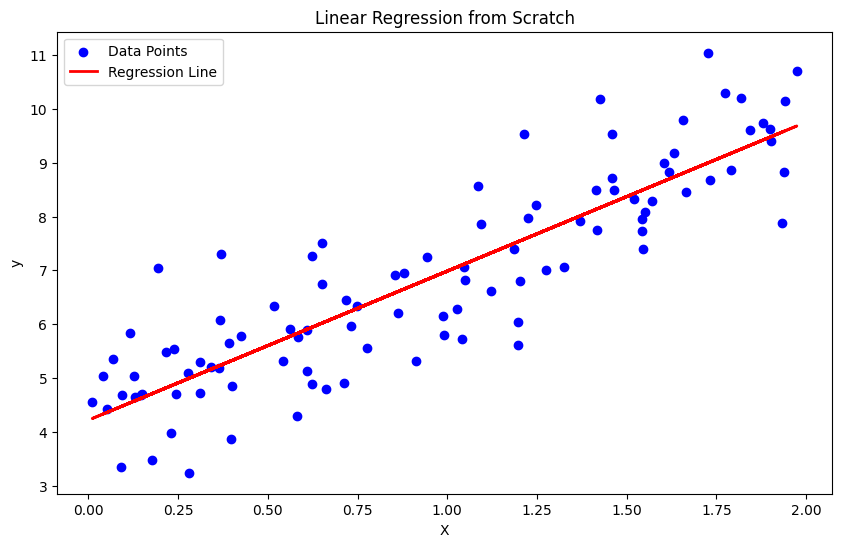

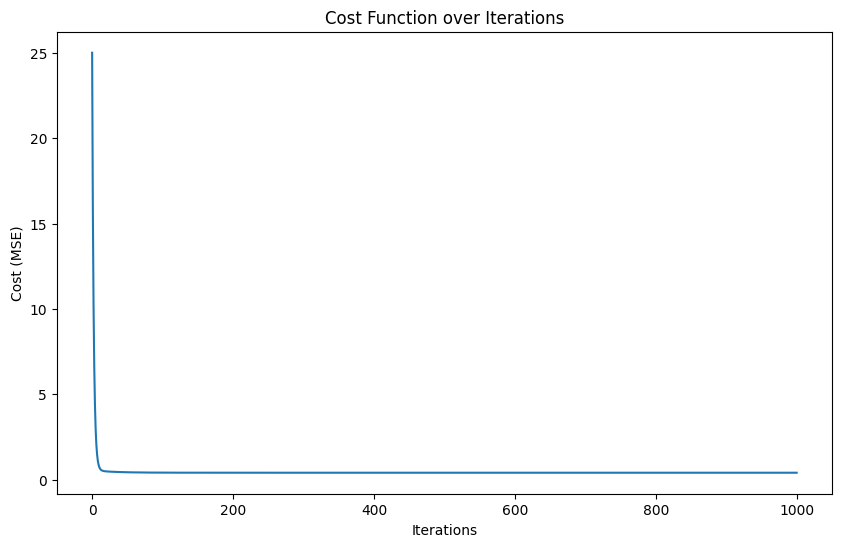

In [4]:
class LinearRegressionFromScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        """
        Train the linear regression model using Gradient Descent.
        """
        n_samples, n_features = X.shape
        
        # Initialize parameters (weights and bias) to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.cost_history = []

        # Gradient Descent Loop
        for i in range(self.n_iterations):
            # 1. Prediction (y_pred = wx + b)
            y_predicted = np.dot(X, self.weights) + self.bias

            # 2. Compute Gradients
            # Derivative w.r.t weights: (2/n) * sum(x * (y_pred - y))
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            # Derivative w.r.t bias: (2/n) * sum(y_pred - y)
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # 3. Update Parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # 4. Calculate and store cost (MSE) for tracking
            cost = (1 / (2 * n_samples)) * np.sum((y_predicted - y) ** 2)
            self.cost_history.append(cost)

            if i % 100 == 0:
                print(f"Iteration {i}: Cost {cost}")

    def predict(self, X):
        """
        Make predictions using the trained weights and bias.
        """
        return np.dot(X, self.weights) + self.bias

# --- Usage Example (Copy this into your Jupyter Notebook) ---

# 1. Generate some synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)        # 100 samples, 1 feature
y = 4 + 3 * X.flatten() + np.random.randn(100) # y = 4 + 3x + noise

# 2. Instantiate and train the model
model = LinearRegressionFromScratch(learning_rate=0.1, n_iterations=1000)
model.fit(X, y)

print(f"\nFinal Weights (Slope): {model.weights}")
print(f"Final Bias (Intercept): {model.bias}")

# 3. Predict on the training data to visualize
predictions = model.predict(X)

# 4. Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, predictions, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression from Scratch')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# 5. Plot Cost History (to verify Gradient Descent worked)
plt.figure(figsize=(10, 6))
plt.plot(model.cost_history)
plt.title('Cost Function over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Final Weights (Slope): 2.7701133864384837
Final Bias (Intercept): 4.215096157546747
Mean Squared Error: 0.8065845639670531


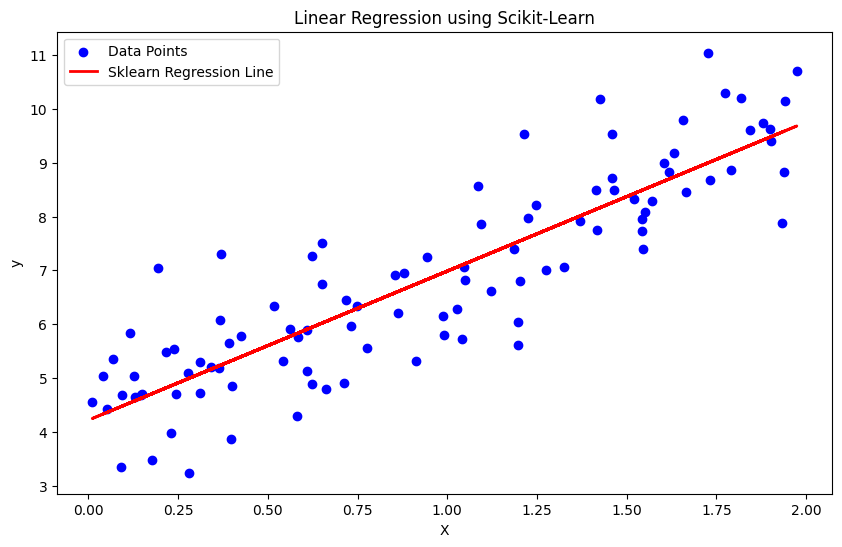

In [8]:
# 1. Generate some synthetic data (Same parameters as the scratch version)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.flatten() + np.random.randn(100) 

# 2. Instantiate and train the model using Scikit-Learn
# Scikit-learn handles the Gradient Descent (or OLS) math internally
model = LinearRegression()
model.fit(X, y)

# 3. Output parameters
# Note: sklearn stores the slope in .coef_ and intercept in .intercept_
print(f"Final Weights (Slope): {model.coef_[0]}")
print(f"Final Bias (Intercept): {model.intercept_}")

# 4. Predict
y_predicted = model.predict(X)

# Calculate MSE using sklearn's utility
mse = mean_squared_error(y, y_predicted)
print(f"Mean Squared Error: {mse}")

# 5. Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_predicted, color='red', linewidth=2, label='Sklearn Regression Line')
plt.title('Linear Regression using Scikit-Learn')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()